Highest sentiment tweet: #STOSAR  LIVE: Celebrating International day of Plant Health 12 May in Limpopo https://t.co/IkWskTEy05
@FAO is the lead implementing agency for 2 components of the Support Towards the Operationalization of the SADC Regional Agricultural Policy Project #STOSAR supported by EU https://t.co/jDRufWhr3S , Compound: 0.8271

Lowest sentiment tweet: Customize Surface Hub with Progressive Web Apps https://t.co/rgJU22Mr28 #techcommunity , Compound: 0.0


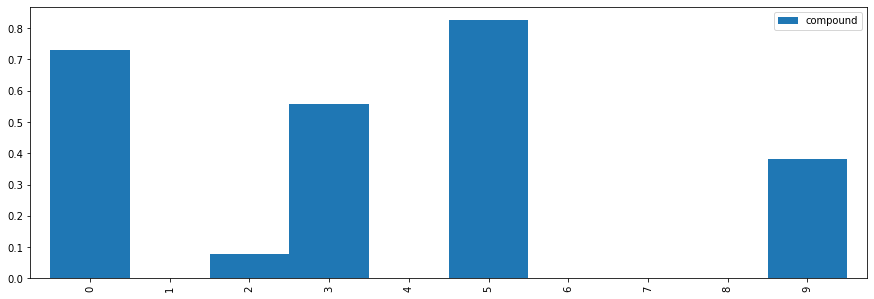

In [29]:
import pandas as pd
import tweepy
import config
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Setup analyzer and twitter api objects
analyzer = SentimentIntensityAnalyzer()
client = tweepy.Client(bearer_token=config.BEARER_TOKEN)

# Retrieve tweets that are english and have a certain phrase in them
tweets = client.search_recent_tweets(query="Microsoft lang:en -is:retweet")

# Analyse the tweets with vaderSentiment and save the result of each tweet
tweetsWithSent = []
for t in tweets.data:
    text = t.text
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text': text, 'compound': ps['compound']})

# Plot the result of analysis
# - A high compound can be regarderd as a highly positive tweet (1 being the highest posibile score)
# - A low compound can be regarded as a highly negative tweet (-1 being the lowest possibile score)
# - A compound score of 0 can be regarded as a highly neatral tweet
tweetdf = pd.DataFrame(tweetsWithSent)
tweetdf.plot.bar(figsize=(15, 5), width=1)

highestSentimentTweet = tweetsWithSent[0]
for t in tweetsWithSent:
    if highestSentimentTweet['compound'] <= t['compound']:
        highestSentimentTweet = t

lowestSentimentTweet = tweetsWithSent[0]
for t in tweetsWithSent:
    if lowestSentimentTweet['compound'] >= t['compound']:
        lowestSentimentTweet = t

print("Highest sentiment tweet: % s , Compound: % s" % (highestSentimentTweet['text'], highestSentimentTweet['compound']))
print()
print("Lowest sentiment tweet: % s , Compound: % s" % (lowestSentimentTweet['text'], lowestSentimentTweet['compound']))


Highest sentiment tweet: "Instantiation Expressions" in TypeScript 4.7 are sooooooo useful, I can't wait to refactor my code :P
https://t.co/bkhPgEuxeB , Compound: 0.040611764705882354

Lowest sentiment tweet: If you use one of the major versions of Windows, you're at risk from a new zero-day attack — immediate action required. ⚠️

Read about it via @forbes https://t.co/JODbNdUv28 #cybersecurity #ZeroDayAttack #ZeroDay #cybercrime , Compound: -0.022724242424242425


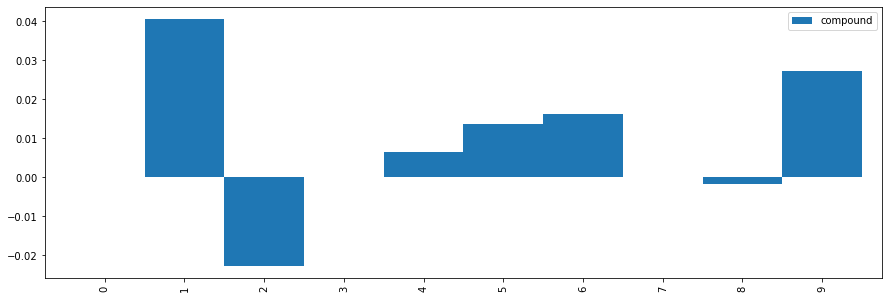

In [52]:
import pandas as pd
import tweepy
import config
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Setup analyzer and twitter api objects
analyzer = SentimentIntensityAnalyzer()
client = tweepy.Client(bearer_token=config.BEARER_TOKEN)

# Retrieve tweets that are english and have a certain phrase in them
tweets = client.search_recent_tweets(query="Microsoft lang:en -is:retweet")

# Analyse the tweets with vaderSentiment and save the result of each tweet
tweetsWithSent = []
for t in tweets.data:
    words = t.text.split()
    sentiment = 0
    for word in words:
        ps = analyzer.polarity_scores(word)
        sentiment += ps['compound']
       
    tweetsWithSent.append({'text': t.text, 'compound': sentiment/len(words)})

# Plot the result of analysis
# - A high compound can be regarderd as a highly positive tweet (1 being the highest posibile score)
# - A low compound can be regarded as a highly negative tweet (-1 being the lowest possibile score)
# - A compound score of 0 can be regarded as a highly neatral tweet
tweetdf = pd.DataFrame(tweetsWithSent)
tweetdf.plot.bar(figsize=(15, 5), width=1)

highestSentimentTweet = tweetsWithSent[0]
for t in tweetsWithSent:
    if highestSentimentTweet['compound'] <= t['compound']:
        highestSentimentTweet = t

lowestSentimentTweet = tweetsWithSent[0]
for t in tweetsWithSent:
    if lowestSentimentTweet['compound'] >= t['compound']:
        lowestSentimentTweet = t

print("Highest sentiment tweet: % s , Compound: % s" % (highestSentimentTweet['text'], highestSentimentTweet['compound']))
print()
print("Lowest sentiment tweet: % s , Compound: % s" % (lowestSentimentTweet['text'], lowestSentimentTweet['compound']))

Highest sentiment tweet: @Microsoft uses markdown for their technical docs https://t.co/uwRGAPAp8y 👏👏👏 You should do it too :) 
cc: @ruphy @librementesw , Compound: 0.4588

Lowest sentiment tweet: @Microsoft Them: you have time for a chat?
Me: no
Them: well, anyways... , Compound: -0.011399999999999993


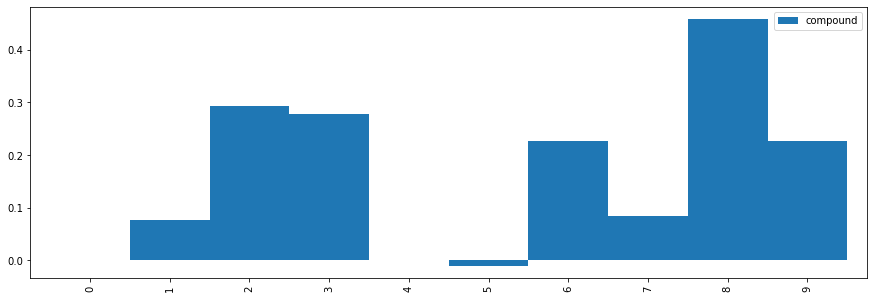

In [51]:
import pandas as pd
import tweepy
import config
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Setup analyzer and twitter api objects
analyzer = SentimentIntensityAnalyzer()
client = tweepy.Client(bearer_token=config.BEARER_TOKEN)

# Retrieve tweets that are english and have a certain phrase in them
tweets = client.search_recent_tweets(query="Microsoft lang:en -is:retweet")

# Analyse the tweets with vaderSentiment and save the result of each tweet
tweetsWithSent = []
for t in tweets.data:
    words = t.text.split()
    wordsWithSentiment = []
    sentiment = 0
    for word in words:
        ps = analyzer.polarity_scores(word)
        if ps['compound'] != 0:
            wordsWithSentiment.append(word)
            sentiment += ps['compound']
    
    tweetsWithSent.append({'text': t.text, 'compound': sentiment/(len(wordsWithSentiment) if len(wordsWithSentiment) != 0 else 1)})

# Plot the result of analysis
# - A high compound can be regarderd as a highly positive tweet (1 being the highest posibile score)
# - A low compound can be regarded as a highly negative tweet (-1 being the lowest possibile score)
# - A compound score of 0 can be regarded as a highly neatral tweet
tweetdf = pd.DataFrame(tweetsWithSent)
tweetdf.plot.bar(figsize=(15, 5), width=1)

highestSentimentTweet = tweetsWithSent[0]
for t in tweetsWithSent:
    if highestSentimentTweet['compound'] <= t['compound']:
        highestSentimentTweet = t

lowestSentimentTweet = tweetsWithSent[0]
for t in tweetsWithSent:
    if lowestSentimentTweet['compound'] >= t['compound']:
        lowestSentimentTweet = t

print("Highest sentiment tweet: % s , Compound: % s" % (highestSentimentTweet['text'], highestSentimentTweet['compound']))
print()
print("Lowest sentiment tweet: % s , Compound: % s" % (lowestSentimentTweet['text'], lowestSentimentTweet['compound']))